In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv('../datasets/test.csv')

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
train_df.loc[:, train_df.isnull().any()]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


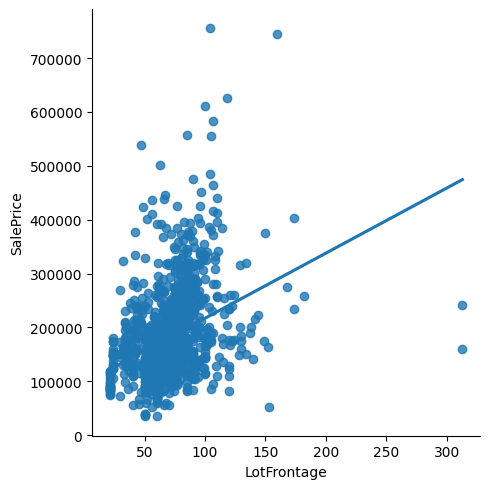

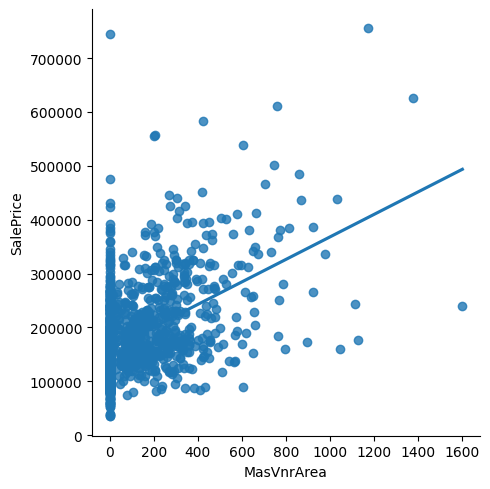

In [6]:
sns.lmplot(x='LotFrontage', y='SalePrice', data=train_df, fit_reg=True, ci=None)
sns.lmplot(x='MasVnrArea', y='SalePrice', data=train_df, fit_reg=True, ci=None)

In [7]:
print('\ntrain data na count\n')
print(train_df.loc[:, train_df.isnull().any()].isna().sum())
print('\ntest data na count\n')
print(test_df.loc[:, test_df.isnull().any()].isna().sum())


train data na count

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

test data na count

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1

In [19]:
# fill_w_mean values
train_df[['LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
               'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']]

,LotFrontage,Utilities,Exterior1st,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,65.0,AllPub,VinylSd,VinylSd,706,0,150,856,1,0,Gd,Typ,2,548,WD
1,80.0,AllPub,MetalSd,MetalSd,978,0,284,1262,0,1,TA,Typ,2,460,WD
2,68.0,AllPub,VinylSd,VinylSd,486,0,434,920,1,0,Gd,Typ,2,608,WD
3,60.0,AllPub,Wd Sdng,Wd Shng,216,0,540,756,1,0,Gd,Typ,3,642,WD
4,84.0,AllPub,VinylSd,VinylSd,655,0,490,1145,1,0,Gd,Typ,3,836,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,AllPub,VinylSd,VinylSd,0,0,953,953,0,0,TA,Typ,2,460,WD
1456,85.0,AllPub,Plywood,Plywood,790,163,589,1542,1,0,TA,Min1,2,500,WD
1457,66.0,AllPub,CemntBd,CmentBd,275,0,877,1152,0,0,Gd,Typ,1,252,WD
1458,68.0,AllPub,MetalSd,MetalSd,49,1029,0,1078,1,0,Gd,Typ,1,240,WD


In [20]:
train_df[['LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
               'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']].describe()

,LotFrontage,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,443.639726,46.549315,567.240411,1057.429452,0.425342,0.057534,1.767123,472.980137
std,24.284752,456.098091,161.319273,441.866955,438.705324,0.518911,0.238753,0.747315,213.804841
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1.000000,334.500000
50%,69.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,2.000000,480.000000
75%,80.000000,712.250000,0.000000,808.000000,1298.250000,1.000000,0.000000,2.000000,576.000000
max,313.000000,5644.000000,1474.000000,2336.000000,6110.000000,3.000000,2.000000,4.000000,1418.000000


In [36]:
fill_w_mean_val = train_df[['LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
               'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']].describe().mean()

In [21]:
train_df[['Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']].describe()

,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType
count,1460,1460,1460,1460,1460,1460
unique,2,15,16,4,7,9
top,AllPub,VinylSd,VinylSd,TA,Typ,WD
freq,1459,515,504,735,1360,1267


In [11]:
# null analysis summary
to_ohe = ['MiscFeature', 'MiscVal']

null_fill = {
    'remove_row': ['Electrical'],
    'fill_w_zero': ['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
               'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 
               'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'],
    'fill_w_mean': ['LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea'],
    'fill_w_mean_val': fill_w_mean_val,
    'fill_w_top': ['Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType'],
    'fill_w_top_val': ['AllPub', 'VinylSd', 'VinylSd', 'TA', 'Typ', 'WD'],
}